## Random Sample Imputation:

Random sample imputation is a method used in statistics and data analysis to handle missing data in a dataset. When working with data, it's common to encounter missing values for various reasons, such as data entry errors, non-responses in surveys, or equipment malfunctions. In such cases, you can't simply ignore the missing data, as it can lead to biased or inaccurate results. Instead, you need to impute or estimate the missing values to make the dataset complete.

Random sample imputation involves filling in missing values by drawing values from the observed data in a random manner. Here's how it typically works:

1. Identify the variables with missing data in your dataset.

2. For each observation with a missing value in a particular variable, select a value from the observed data for that variable at random. This value can be drawn with or without replacement, depending on your choice of implementation.

3. Repeat this process for each missing value in the dataset, drawing values independently for each missing entry.

4. Continue this process until all missing values have been imputed.

This approach has the advantage of introducing randomness, which can help preserve the variability and distribution of the original data. However, it may not be suitable for all datasets, as it doesn't consider any patterns or relationships in the data. In cases where the missing data is not missing completely at random (MCAR) or missing at random (MAR), random sample imputation may introduce bias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataframe = pd.read_csv('Titanic.csv')

In [4]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataframe.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
dataframe.shape

(891, 12)

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
dataframe.select_dtypes(include = 'object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [10]:
dataframe.isna().sum().any()

True

In [12]:
dataframe.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is 177 null values are present in Age feature.

In [13]:
dataframe['Age'].dropna().sample()

361    29.0
Name: Age, dtype: float64

 where .dropna() function drop all nan values in that feature and .sample() function return any one random value

In [14]:
dataframe['Age'].dropna().sample(dataframe['Age'].isnull().sum())

883    28.0
786    18.0
583    36.0
703    25.0
630    80.0
       ... 
102    21.0
707    42.0
44     19.0
220    16.0
175    18.0
Name: Age, Length: 177, dtype: float64

this function check where is null values are present and replace Nan with random sample

In [15]:
dataframe['Age'].dropna().sample(dataframe['Age'].isna().sum(), random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

The function checks for missing values (NaN) in a dataset and replaces them with random values from the same dataset. It uses a random_state parameter to ensure that the replacement values remain consistent across runs. In simpler terms:

1. Identify where there are missing values (NaN) in the dataset.
2. For each missing value, replace it with a random value from the dataset.
3. Use the random_state parameter to ensure that the replacement values stay the same every time you run the function.

This process helps fill in missing data in a consistent and repeatable manner using random values from the existing dataset.

In [16]:
dataframe[dataframe['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

This line of code return a index where Age is NaN

In [17]:
def RSI(dataframe, variable, medina):
    dataframe[variable+'median'] = dataframe[variable].fillna(median)
    dataframe[variable+'random'] = dataframe[variable]
    random_sample_value = dataframe[variable].dropna().sample(dataframe[variable].isnull().sum(), random_state = 0)
    random_sample_value.index = dataframe[dataframe[variable].isnull()].index
    dataframe.loc[dataframe[variable].isnull(), variable+'random'] = random_sample_value

1. The code defines a Python function called `RSI` that performs random sample imputation for a given variable in a DataFrame.

2. The function takes three arguments: `dataframe` (the DataFrame containing the data), `variable` (the name of the variable to impute missing values for), and `median` (the value used for median imputation).

3. The function creates two new columns in the DataFrame:
   - `variable+'median'`: This column stores the result of median imputation, where missing values in the original variable are filled with the specified median value.
   - `variable+'random'`: This column initially copies the values from the original variable.

4. It generates random values for the missing entries using the following steps:
   - It selects all non-null values from the original variable using `dropna()`.
   - It samples from these non-null values a number of times equal to the count of missing values in the original variable. The `random_state=0` parameter ensures that the random samples are reproducible.

5. The random samples are assigned to the corresponding indices of missing values in the `random_sample_value` series.

6. The missing values in the `variable+'random'` column are replaced with the generated random samples, matching them by the index of missing values in the original variable.

7. After running the function, your DataFrame will have two new columns: one with missing values imputed using the median (`variable+'median'`) and another with missing values imputed using random samples (`variable+'random'`).

In [18]:
median = dataframe['Age'].median()

In [20]:
median

28.0

In [21]:
RSI (dataframe, 'Age', median)

In [22]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agemedian,Agerandom
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


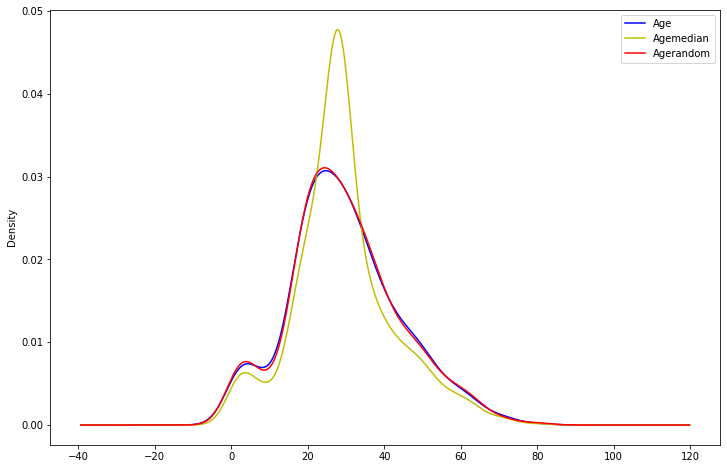

In [24]:
plt.figure(figsize=(12,8))
dataframe.Age. plot(kind='kde',
                    color='b')
dataframe.Agemedian.plot(kind='kde',
                          color='y')
dataframe.Agerandom.plot(kind='kde',
                          color='r')
plt.legend()

## Note :

Random Sample Imputation can be better than Mean, Median, or Mode Imputation in some situations. 

1. When you use Median (or Mean) to fill in missing values, it can sometimes distort the original data because it substitutes missing values with a single fixed number. This can change the overall shape of your data.

2. On the other hand, Random Sample Imputation is a bit like taking a random guess for each missing value. This means you're using values from the dataset itself, and this randomness can help preserve the original data's characteristics with less distortion. 

3. However, Random Sample Imputation doesn't work well in every case. It assumes that the missing values can be replaced by any random value from the same dataset, which might not be true for all types of data. In some situations, it can introduce noise or incorrect information.

Random Sample Imputation is a valuable approach, but it's not a one-size-fits-all solution. You should choose the imputation method that best fits the nature of your data and the goals of your analysis.